In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transfer Learning using VGG-19 model

In [9]:
#loading different libraries
#TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks,
#while Keras is a high-level neural network library that runs on top of TensorFlow.
#Both provide high-level APIs used for easily building and training models
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
import keras
from keras.models import Model
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [10]:
# data loading, augmentation is optional
#Generate batches of tensor image data with real-time data augmentation.

##Training Data
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/train",target_size=(224,224))
##Validation Data
valdata = ImageDataGenerator()
validationdata = valdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/val", target_size=(224,224))
##Test Data
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"/content/drive/MyDrive/Data/test", target_size=(224,224))

Found 4211 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
## Transfer Learning using VGG-19 model
from keras.applications.vgg19 import VGG19

#Load VGG19 model previously trained on Imagenet dataset. It is already trained on large number of classes and generalised, so go to consider to train new dataset.
vggmodel = VGG19(weights='imagenet', include_top=True)

#It predicts the summary of the model in a tabular format
vggmodel.summary()

##Freezing all layers of the model. VGG19 model has 19 layers
for layers in (vggmodel.layers)[:19]:
    #print(layers)
    layers.trainable = False

##changing number of nodes in the last dense layer as per the number of classes.
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)

##Final model is the combination of inputs and defined model architecture i.e. VGG19
#model_final = Model(input = vggmodel.input, output = predictions) ### previouscommand
model_final = Model(vggmodel.input, predictions) ### updated command

#It predicts the summary of the model in a tabular format
model_final.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:

#This cell is to define the hyperparameters to train the model.

#optimizer and learning rate. Adam is the optimizer, Learning rate: 1e-3
optimizer = optimizers.Adam(learning_rate=1e-3)

##compilation of the model with given optimzer. Accuracy is metric on which we can see the performance
model_final.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [13]:
/#Model fitting. verbose is the choice that how you want to see the output of your Nural Network while it's training.
#If you set verbose = 0, It will show nothing.
#here you have to give the defined varaibles where data get stored i.e. traindata, validation data
history = model_final.fit(
    traindata,
    epochs=10,
    verbose=1,
    validation_data=validationdata
)

Epoch 1/10
132/132 [==============================] - 49s 335ms/step - loss: 1.5288 - accuracy: 0.8608 - val_loss: 0.1891 - val_accuracy: 0.9264
Epoch 2/10
132/132 [==============================] - 47s 359ms/step - loss: 0.1728 - accuracy: 0.9347 - val_loss: 0.1634 - val_accuracy: 0.9424
Epoch 3/10
132/132 [==============================] - 44s 331ms/step - loss: 0.5887 - accuracy: 0.9159 - val_loss: 0.1550 - val_accuracy: 0.9397
Epoch 4/10
132/132 [==============================] - 45s 341ms/step - loss: 0.1301 - accuracy: 0.9470 - val_loss: 0.1134 - val_accuracy: 0.9557
Epoch 5/10
132/132 [==============================] - 44s 331ms/step - loss: 0.1035 - accuracy: 0.9589 - val_loss: 0.1158 - val_accuracy: 0.9583
Epoch 6/10
132/132 [==============================] - 44s 334ms/step - loss: 0.0824 - accuracy: 0.9682 - val_loss: 0.1057 - val_accuracy: 0.9649
Epoch 7/10
132/132 [==============================] - 45s 339ms/step - loss: 0.0733 - accuracy: 0.9727 - val_loss: 0.0820 - val_ac

<Figure size 640x480 with 0 Axes>

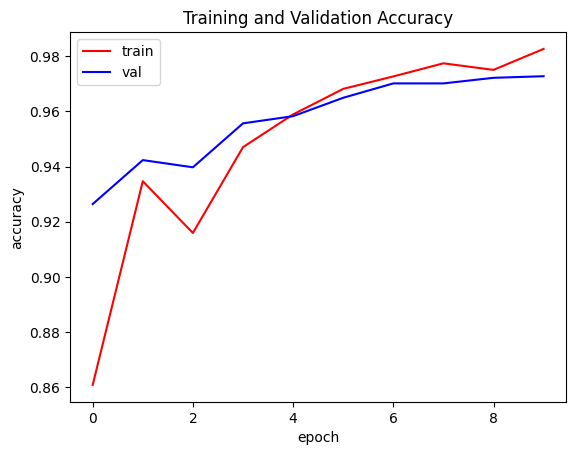

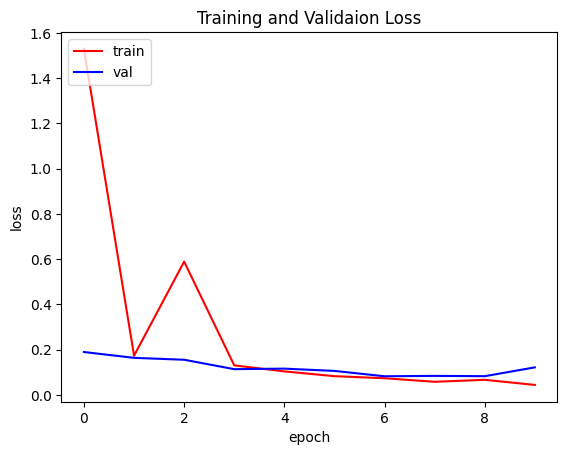

<Figure size 640x480 with 0 Axes>

In [14]:
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.
#here it will plot accuracy and loss curve

#loading libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#storing the string of array related to accuracy and loss (Training and Loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#number of epochs == length of array
epochs = range(len(acc))

#define the title and other information for the plotted graph
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
!pip install

In [17]:
##assessment of performance on the test set

##loading libraries
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
print("==============TEST RESULTS============")
from sklearn.metrics import confusion_matrix  ##for printing the confusion matrix
y_pred = model_final.predict(testdata)      ##predicting the test data set using trained model i.e. model_final
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['normal', 'pneumonia']      ##defining the classes
print(classification_report(testdata.classes, y_pred, target_names=target_names))      ##printing the classification report

==============TEST RESULTS============
20/20 [==============================] - 3s 162ms/step
Confusion Matrix
[[ 24 210]
 [ 42 348]]
Classification Report
              precision    recall  f1-score   support

      normal       0.36      0.10      0.16       234
   pneumonia       0.62      0.89      0.73       390

    accuracy                           0.60       624
   macro avg       0.49      0.50      0.45       624
weighted avg       0.53      0.60      0.52       624



In [18]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_final.evaluate(testdata)

print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 3s 151ms/step - loss: 1.9443 - accuracy: 0.7147
Test Accuracy: 0.7147436141967773
